
### Himanshu Baweja

### E20CSE212

### Week 5 Lab 1

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
data=pd.read_csv("/content/drive/MyDrive/speeddating.csv")
data.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(8378, 123)

In [92]:
col=['gender','field']
data = pd.get_dummies(data,columns=col)
data.head(5)

,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,...,field_Nutrition,field_Nutrition/Genetics,field_Nutritiron,field_Philosophy,field_Physics,field_Polish,field_Psychology,field_QMSS,field_Religion,field_Sociology,field_Statistics,field_Stats,field_TESOL,field_Theater,field_anthropology,field_biochemistry/genetics,field_biology,field_biomedicine,field_biotechnology,field_business,field_chemistry,field_education,field_engineering,field_epidemiology,field_film,field_french,field_genetics,field_journalism,field_law,field_math,field_medicine,field_microbiology,field_money,field_nutrition,field_philosophy,field_physics,field_psychology,field_sociology,field_theory,field_working
0,0,1,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,20,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,20,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,20,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,8,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],[2-5],30,10,20,10,10,20,[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],8,7,9,6,9,7,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
for col in data.columns:

  if(type(data[col][0])==str):

    if '[' in list(data[col][0]):
      str1 = data[col][0].split('-')
      str1_0 = str1[0].split('[')
      str1_1 = str1[1].split(']')
      for i in range(8378):
        j = float(str1_0[1])
        k = float(str1_1[0])
        avg = (k + j)/2
        data[col][i] =int(avg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [94]:
data.head(1)

,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,...,field_Nutrition,field_Nutrition/Genetics,field_Nutritiron,field_Philosophy,field_Physics,field_Polish,field_Psychology,field_QMSS,field_Religion,field_Sociology,field_Statistics,field_Stats,field_TESOL,field_Theater,field_anthropology,field_biochemistry/genetics,field_biology,field_biomedicine,field_biotechnology,field_business,field_chemistry,field_education,field_engineering,field_epidemiology,field_film,field_french,field_genetics,field_journalism,field_law,field_math,field_medicine,field_microbiology,field_money,field_nutrition,field_philosophy,field_physics,field_psychology,field_sociology,field_theory,field_working
0,0,1,21,27,6,5,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,3,3,35,20,20,20,0,5,60,18,18,18,7,7,6,8,8,8,8,6,7,7,7,7,7,7,15,20,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.preprocessing import MultiLabelBinarizer
for i in range(8378):
  r=data['race'][i]
  
  r=r.split("-")
  if(len(r)==1):
    
    data['race_o'][i]=r[0]
    
  else:
    r1=r[0]
    r2=r[1]
    r1=r1.split("/")
    r1=list(set(r1))
    r1='/'.join(r1)
    r1=r1+'-'+r2
    data['race'][i]=r1
  r=data['race_o'][i]

  r=r.split("-")
  if(len(r)==1):
    
    data['race_o'][i]=r[0]
    
  else:
    
    r1=r[0]
    r2=r[1]
    r1=r1.split("/")
    r1=list(set(r1))
    r1='/'.join(r1)
    r1=r1+'-'+r2
    data['race_o'][i]=r1
    

mlb1 = MultiLabelBinarizer()
mlb2 = MultiLabelBinarizer()

race_encoded = mlb1.fit_transform(data['race'])
race_o_encoded = mlb2.fit_transform(data['race_o'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be

In [96]:
data=data.replace("?",0)

In [97]:
data.head(1)

,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,...,field_Nutrition,field_Nutrition/Genetics,field_Nutritiron,field_Philosophy,field_Physics,field_Polish,field_Psychology,field_QMSS,field_Religion,field_Sociology,field_Statistics,field_Stats,field_TESOL,field_Theater,field_anthropology,field_biochemistry/genetics,field_biology,field_biomedicine,field_biotechnology,field_business,field_chemistry,field_education,field_engineering,field_epidemiology,field_film,field_french,field_genetics,field_journalism,field_law,field_math,field_medicine,field_microbiology,field_money,field_nutrition,field_philosophy,field_physics,field_psychology,field_sociology,field_theory,field_working
0,0,1,21,27,6,5,Pacific Islander/'Asian/Asian-American',Caucasian/European-American,0,2,4,3,3,35,20,20,20,0,5,60,18,18,18,7,7,6,8,8,8,8,6,7,7,7,7,7,7,15,20,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
col=['race','race_o']
data = pd.get_dummies(data,columns=col)
data.head(5)

,has_null,wave,age,age_o,d_age,d_d_age,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,...,field_TESOL,field_Theater,field_anthropology,field_biochemistry/genetics,field_biology,field_biomedicine,field_biotechnology,field_business,field_chemistry,field_education,field_engineering,field_epidemiology,field_film,field_french,field_genetics,field_journalism,field_law,field_math,field_medicine,field_microbiology,field_money,field_nutrition,field_philosophy,field_physics,field_psychology,field_sociology,field_theory,field_working,race_0,race_'Black/African American',race_'Latino/Hispanic American',race_Caucasian/European-American,race_Other,race_Pacific Islander/'Asian/Asian-American',race_o_0,race_o_'Black/African American',race_o_'Latino/Hispanic American',race_o_Caucasian/European-American,race_o_Other,race_o_Pacific Islander/'Asian/Asian-American'
0,0,1,21,27,6,5,0,2,4,3,3,35,20,20,20,0,5,60,18,18,18,7,7,6,8,8,8,8,6,7,7,7,7,7,7,15,20,20,15,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,21,22,1,5,0,2,4,3,3,60,0,0,40,0,0,60,18,18,18,7,7,7,8,10,7,7,5,7,7,7,7,7,7,15,20,20,15,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,1,21,22,1,5,1,2,4,3,3,19,18,19,18,14,12,60,18,18,18,7,7,10,10,10,10,10,10,7,7,7,7,7,7,15,20,20,15,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,1,21,23,2,5,0,2,4,3,3,30,5,15,40,5,5,60,18,18,18,7,7,7,8,9,8,9,8,7,7,7,7,7,7,15,20,20,15,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,1,21,24,3,5,0,2,4,3,3,30,10,20,10,10,20,60,18,18,18,7,7,8,7,9,6,9,7,7,7,7,7,7,7,15,20,20,15,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [105]:
from sklearn.preprocessing import MinMaxScaler
from numpy import array
col2=['age','age_o','d_age','d_d_age','importance_same_race','importance_same_religion','d_importance_same_race','d_importance_same_religion','pref_o_attractive','pref_o_sincere'
,'pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests','d_pref_o_attractive','d_pref_o_sincere','d_pref_o_intelligence','d_pref_o_funny']
scale=MinMaxScaler()
scale.fit(data[[i for i in col2]])

MinMaxScaler()

In [106]:
X = data.iloc[:, 1:]
Y = data.iloc[:, :1]
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.30,random_state=0)

In [107]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=2,min_samples_split=2,min_samples_leaf=3,max_features=3,random_state=2,max_leaf_nodes=5)
clf=clf.fit(x_train,y_train)

In [109]:
ypred=clf.predict(x_test)

In [110]:
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_recall_fscore_support as prfs
accuracy=ac(y_test,ypred)
matrix=cm(y_test,ypred)
precision=prfs(y_test,ypred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
accuracy

0.8818615751789977

In [112]:
at=[0.8859188544152745,0.8835322195704057]

In [113]:
matrix

array([[   0,  297],
       [   0, 2217]])

In [114]:
precision

(array([0.        , 0.88186158]),
 array([0., 1.]),
 array([0.        , 0.93722257]),
 array([ 297, 2217]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


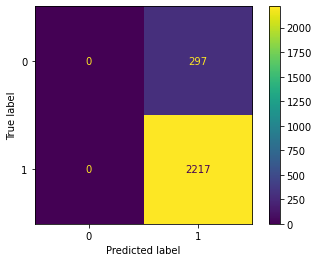

In [115]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


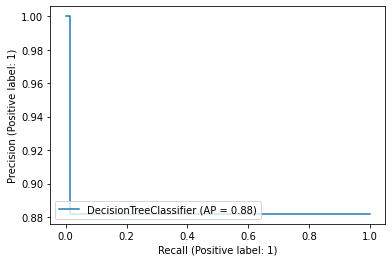

In [116]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


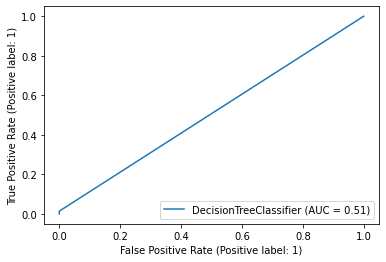

In [117]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,x_test,y_test)

In [118]:
df= LogisticRegression()
df.fit(x_train,y_train)
pred = df.predict(x_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 1, 1, ..., 1, 0, 1])

In [121]:
acc=ac(y_test,pred)
acc

0.9530628480509149

In [120]:
aclr=[0.9575178997613365,0.9530628480509149]

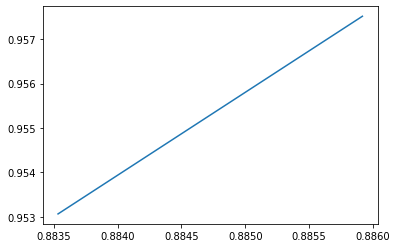

In [119]:
plt.plot(at,aclr)